# Artificial Neural Networks (ANN)

## Objectives

```
- Classification of data with multi-class labels.
- 
- 
```

In [1]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
# Configure the backend
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
import seaborn as sns

# load data
iris_data = sns.load_dataset("iris")

# Preprocess the data
condlist = [
    (iris_data["species"] == "setosa"),
    (iris_data["species"] == "versicolor"),
    iris_data["species"] == "virginica",
]
choicelist = [0, 1, 2]
iris_data["target"] = np.select(condlist=condlist, choicelist=choicelist)

iris_data.sample(n=5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species,target
14,5.8,4.0,1.2,0.2,setosa,0
98,5.1,2.5,3.0,1.1,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
16,5.4,3.9,1.3,0.4,setosa,0
131,7.9,3.8,6.4,2.0,virginica,2


In [3]:
iris_data.get("species").value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [4]:
# Convert the data to Torch tensor
X = torch.tensor(iris_data.loc[:, iris_data.columns[:4]].values).float()
y = torch.tensor(iris_data["target"].values).long()

X.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [5]:
def create_iris_data() -> tuple[np.ndarray, np.ndarray]:
    """This returns the independent and the target features."""
    # load data
    iris_data = sns.load_dataset("iris")

    # Preprocess the data
    condlist = [
        (iris_data["species"] == "setosa"),
        (iris_data["species"] == "versicolor"),
        iris_data["species"] == "virginica",
    ]
    choicelist = [0, 1, 2]
    iris_data["target"] = np.select(condlist=condlist, choicelist=choicelist)

    # Convert the data to Torch tensor
    X = torch.tensor(iris_data.loc[:, iris_data.columns[:4]].values).float()
    y = torch.tensor(iris_data["target"].values).long()

    print(f"Shape of X: {X.shape}, Shape of X: {y.shape}")
    return (X, y)

In [6]:
# Build model
clf = nn.Sequential(
    # input
    nn.Linear(4, 64),
    # Activation
    nn.ReLU(),
    # Hidden layer 1
    nn.Linear(64, 64),
    # Activation
    nn.ReLU(),
    # Ouput
    nn.Linear(64, 3),
    # Final activation
    nn.Softmax(dim=1),
)
learning_rate, epochs = 0.01, 1_000
# Optimizer
optimizer = torch.optim.SGD(params=clf.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
losses = torch.zeros(size=(epochs, 1))
accuracy_list = []

# Train model
for epoch_idx in range(epochs):
    # Reset the gradients from prev. step loss.backward()
    optimizer.zero_grad()

    # Fwd prop
    _y_pred = clf(X)

    # Compute loss
    loss = criterion(_y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    y_p = torch.argmax(_y_pred, axis=1)
    acc_ = torch.mean((y_p == y).float())
    accuracy_list.append(acc_)

print("Training done ...")

Training done ...


In [7]:
# Make preductions
y_pred_raw = clf(X)

# Evaluate model
y_pred = torch.argmax(y_pred_raw, axis=1)
accuracy = torch.mean((y_pred == y).float())

accuracy

tensor(0.9800)

In [8]:
def visualize_accuracy_n_loss(
    *, accuracy: Union[Sequence, np.ndarray], losses: torch.Tensor
) -> None:
    """This is used to visualize the accuracy and loss per training epoch."""
    _, axs = plt.subplots(1, 2, figsize=(8, 6))

    axs[0].plot(losses.detach())
    axs[0].set(xlabel="Epochs", ylabel="Training Loss", title="Losses")

    axs[1].plot(accuracy)
    axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Accuracy")
    plt.tight_layout()
    plt.show()

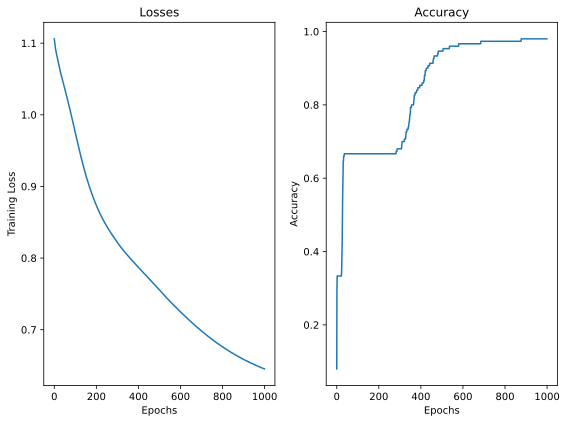

In [9]:
visualize_accuracy_n_loss(accuracy=accuracy_list, losses=losses)

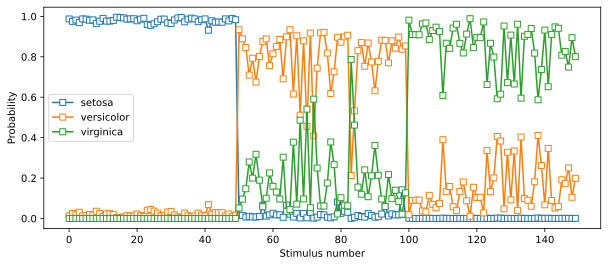

In [10]:
fig = plt.figure(figsize=(10, 4))

plt.plot(_y_pred.detach(), "s-", markerfacecolor="w")
plt.xlabel("Stimulus number")
plt.ylabel("Probability")
plt.legend(["setosa", "versicolor", "virginica"])
plt.show()

### Example 2

In [11]:
# create data
n_clust = 300
blur = 1

A, B, C = [1, 3], [1, -2], [5, -4]

# generate data
a = [A[0] + np.random.randn(n_clust) * blur, A[1] + np.random.randn(n_clust) * blur]
b = [B[0] + np.random.randn(n_clust) * blur, B[1] + np.random.randn(n_clust) * blur]
c = [C[0] + np.random.randn(n_clust) * blur, C[1] + np.random.randn(n_clust) * blur]

a[0].shape

(300,)

In [12]:
# True labels (NumPy)
label_0, label_1, label_2 = (
    np.zeros(shape=(n_clust, 1)),
    np.ones(shape=(n_clust, 1)),
    np.full(shape=(n_clust, 1), fill_value=2.0),
)
# Stack zeros and ones vertically
labels_np = np.vstack((label_0, label_1, label_2))
labels_np.shape

(900, 1)

In [13]:
# Concatenate into a matrix
data_np = np.hstack((a, b, c)).T
data_np.shape

(900, 2)

In [14]:
# Convert data to PyTorch Tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).reshape(-1).long()

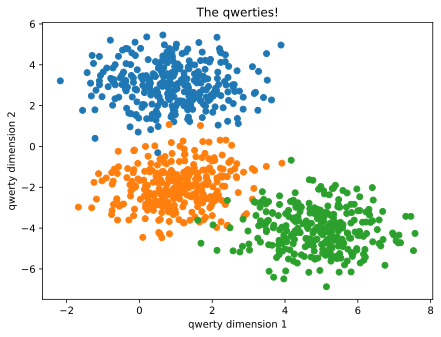

In [15]:
# Visualize data
plt.figure(figsize=(7, 5))

plt.scatter(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1])
plt.scatter(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1])
plt.scatter(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1])

plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")

plt.show()

In [16]:
# Build model
clf = nn.Sequential(
    nn.Linear(2, 64),  # input
    nn.ReLU(),  # Activation
    nn.Linear(64, 64),  # Hidden layer
    nn.ReLU(),  # Activation
    nn.Linear(64, 3),  # Output
    nn.Softmax(dim=1),  # Final activation
)
learning_rate, epochs = 0.01, 5_000
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=clf.parameters(), lr=learning_rate)
losses, accuracy_arr = torch.zeros(size=(epochs,)), torch.zeros(size=(epochs,))

# Train
for epoch_idx in range(epochs):
    # Clear prev gradient
    optimizer.zero_grad()

    # Fwd prop
    _y_pred = clf(data)

    # Compute loss
    loss = criterion(_y_pred, labels)
    losses[epoch_idx] = loss

    # Back prop
    loss.backward()
    optimizer.step()

    # Accuracy
    y_p = torch.argmax(_y_pred, axis=1)
    acc = torch.mean((y_p == labels).float())
    accuracy_arr[epoch_idx] = acc

print("Training done ...")
print(f"Training accuracy: {torch.mean(accuracy_arr):.3f}")

Training done ...
Training accuracy: 0.954


In [17]:
# Make predictions
y_proba = clf(data)
y_pred = torch.argmax(y_proba, axis=1)

# Evaluate model
final_accuracy = torch.mean((y_pred == labels).float())
final_accuracy

tensor(0.9856)

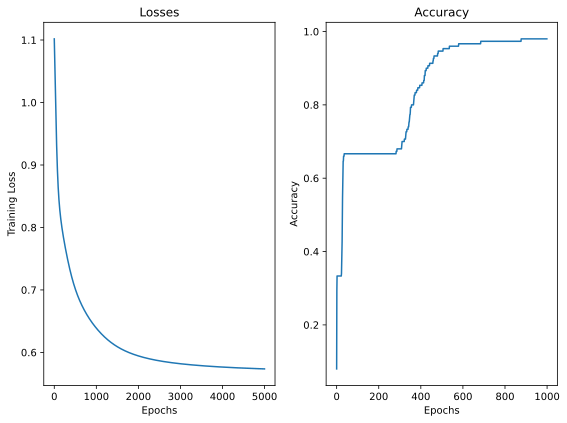

In [18]:
visualize_accuracy_n_loss(accuracy=accuracy_list, losses=losses)

<hr><br>

### Experiement With The Number oF Hidden Units

In [19]:
X, y = create_iris_data()

Shape of X: torch.Size([150, 4]), Shape of X: torch.Size([150])


In [20]:
def build_model(*, n_units: int) -> Any:
    """This is used to build the model architecture."""
    clf = nn.Sequential(
        nn.Linear(4, n_units),  # input
        nn.ReLU(),  # Activation
        nn.Linear(n_units, n_units),  # Hidden layer 1
        nn.ReLU(),  # Activation
        nn.Linear(n_units, 3),  # Ouput
        nn.Softmax(dim=1),  # Final activation
    )
    return clf


def train_model(
    *, model: Any, learning_rate: float, epochs: int, verbose: bool = True
) -> Any:
    """This is used to train the model."""
    # Optimizer
    optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = torch.zeros(size=(epochs,))

    # Train model
    for epoch_idx in range(epochs):
        # Reset the gradients from prev. step loss.backward()
        optimizer.zero_grad()

        # Fwd prop
        _y_pred = model(X)

        # Compute loss
        loss = criterion(_y_pred, y)
        losses[epoch_idx] = loss

        # Back prop
        loss.backward()
        optimizer.step()

    if verbose:
        print("Training done ...")

    return model

In [21]:
# Experiment with different values of hidden units
learning_rate, epochs = 0.01, 150
n_units_arr = np.arange(1, 129)
accuracy_arr = []

for num in n_units_arr:
    model = build_model(n_units=num)
    trained_model = train_model(
        model=model,
        learning_rate=learning_rate,
        epochs=epochs,
        verbose=False,
    )

    # Make predictions
    y_proba = trained_model(X)
    y_pred = torch.argmax(y_proba, axis=1)

    # Evaluate
    acc = torch.mean((y_pred == y).float()) * 100
    accuracy_arr.append(acc)

In [22]:
def visualize(*, accuracy: list, n_units_: np.ndarray) -> None:
    """This is used to visualize the result."""
    _, ax = plt.subplots(1, figsize=(12, 6))

    ax.plot(accuracy, "ko-", markerfacecolor="w", markersize=9)
    ax.plot(n_units_[[0, -1]], [33, 33], "--", color=[0.8, 0.8, 0.8])  # 33.3% accuracy
    ax.plot(n_units_[[0, -1]], [67, 67], "--", color=[0.8, 0.8, 0.8])  # 67% accuracy
    ax.plot(n_units_[[0, -1]], [98, 98], "--", color=[0.8, 0.8, 0.8])  # 98% accuracy
    ax.set_ylabel("accuracy")
    ax.set_xlabel("Number of hidden units")
    ax.set_title("Accuracy")
    plt.show()

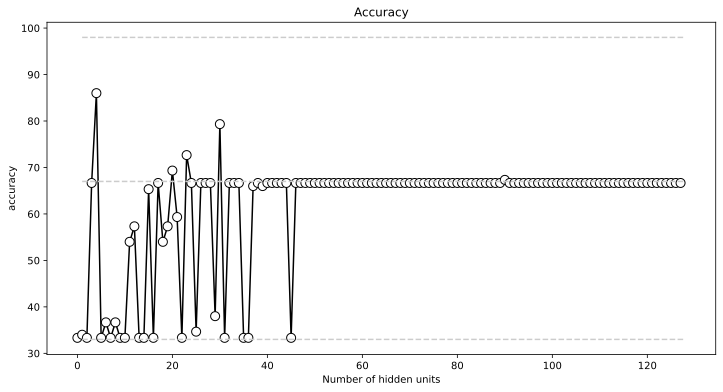

In [23]:
visualize(accuracy=accuracy_arr, n_units_=n_units_arr)

### To Do

```
- 1) The results here show that models with fewer than ~50 hidden units have lackluster performance. Would these models eventually learn if they were given more training epochs? Try this by re-running the experiment using 500 epochs.
```

In [24]:
# Increase the number of epochs
learning_rate, epochs = 0.01, 500
n_units_arr = np.arange(1, 129)
accuracy_arr = []

for num in n_units_arr:
    model = build_model(n_units=num)
    trained_model = train_model(
        model=model,
        learning_rate=learning_rate,
        epochs=epochs,
        verbose=False,
    )

    # Make predictions
    y_proba = trained_model(X)
    y_pred = torch.argmax(y_proba, axis=1)

    # Evaluate
    acc = torch.mean((y_pred == y).float()) * 100
    accuracy_arr.append(acc)

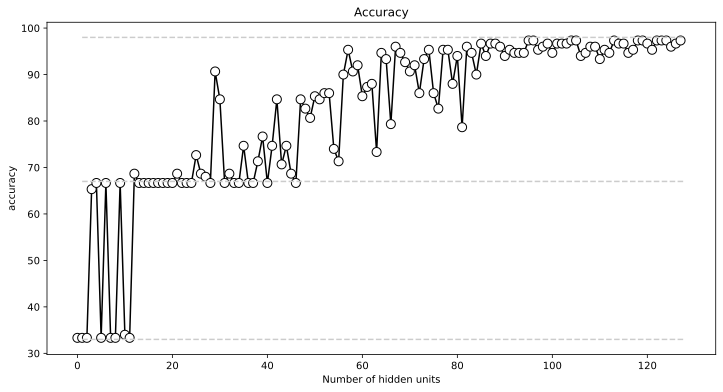

In [25]:
visualize(accuracy=accuracy_arr, n_units_=n_units_arr)

### Comment(s)

```
- Increasing the number of epochs improved the training performace.
```

### To Do

```
2) Going back to 150 epochs, explore the effect of changing the learning rate. This doesn't need to be a full parametric experiment; you can simply try is again using learning rates of 0.1, 0.01 (what we used in the video), and 0.001.
```

In [26]:
# Experiment with the learning rate.
learning_rate, epochs = 0.1, 150
n_units_arr = np.arange(1, 129)
accuracy_arr = []

for num in n_units_arr:
    model = build_model(n_units=num)
    trained_model = train_model(
        model=model,
        learning_rate=learning_rate,
        epochs=epochs,
        verbose=False,
    )

    # Make predictions
    y_proba = trained_model(X)
    y_pred = torch.argmax(y_proba, axis=1)

    # Evaluate
    acc = torch.mean((y_pred == y).float()) * 100
    accuracy_arr.append(acc)

Learning rate=0.1


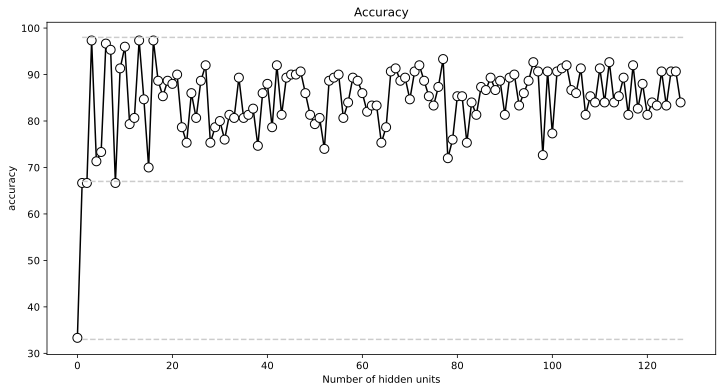

In [27]:
print(f"Learning rate={learning_rate}")
visualize(accuracy=accuracy_arr, n_units_=n_units_arr)

In [28]:
# Experiment with the learning rate.
learning_rate, epochs = 0.001, 150
n_units_arr = np.arange(1, 129)
accuracy_arr = []

for num in n_units_arr:
    model = build_model(n_units=num)
    trained_model = train_model(
        model=model,
        learning_rate=learning_rate,
        epochs=epochs,
        verbose=False,
    )

    # Make predictions
    y_proba = trained_model(X)
    y_pred = torch.argmax(y_proba, axis=1)

    # Evaluate
    acc = torch.mean((y_pred == y).float()) * 100
    accuracy_arr.append(acc)

Learning rate=0.001


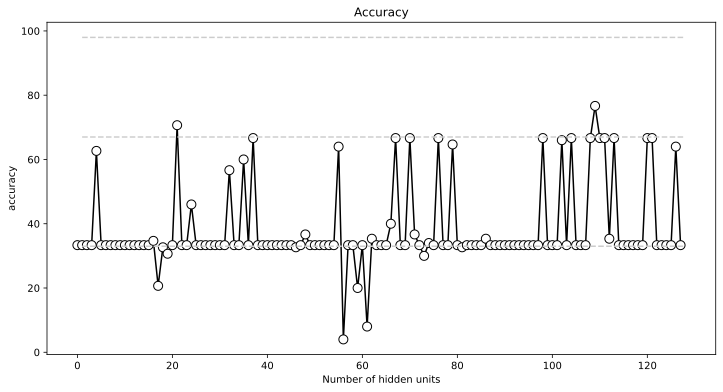

In [29]:
print(f"Learning rate={learning_rate}")
visualize(accuracy=accuracy_arr, n_units_=n_units_arr)

### To Do

```
3) With simple models and small datasets, it's possible to test many different parameter settings. However, larger models take longer to train, and so running 128 tests is not always feasible. Modify the code to have the number of hidden units range from 1 to 128 in steps of 14. Plot the results on top of the results using steps of 1 (that is, show both results in the same graph). Does your interpretation change with fewer experiment runs?
```

In [30]:
# Experiment with the learning rate.
learning_rate, epochs = 0.01, 500
n_units_arr = np.arange(1, 129, 14)
accuracy_arr = []

for num in n_units_arr:
    model = build_model(n_units=num)
    trained_model = train_model(
        model=model,
        learning_rate=learning_rate,
        epochs=epochs,
        verbose=False,
    )

    # Make predictions
    y_proba = trained_model(X)
    y_pred = torch.argmax(y_proba, axis=1)

    # Evaluate
    acc = torch.mean((y_pred == y).float()) * 100
    accuracy_arr.append(acc)

Learning rate=0.01
Number of hidden units: [1, 15, 29, 43, 57, 71, 85, 99, 113, 127]


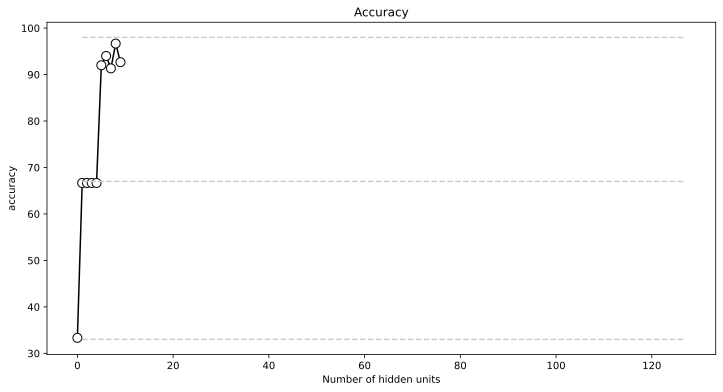

In [31]:
print(f"Learning rate={learning_rate}")
print(f"Number of hidden units: {list(n_units_arr)}")
visualize(accuracy=accuracy_arr, n_units_=n_units_arr)

<hr><br><br>

## Breadth/Width Vs Depth

```
1. Breadth: A DL model has a large breadth if it has a lot of hidden units.
2. Depth: A DL model has a large depth if it has a lot of hidden layers.
```

In [32]:
wide_net = nn.Sequential(
    nn.Linear(2, 4),  # Input layer
    nn.Linear(4, 3),  # Output layer
)

deep_net = nn.Sequential(
    nn.Linear(2, 2),  # Input layer
    nn.Linear(2, 2),  # Hidden layer
    nn.Linear(2, 3),  # Outpul layer
)

print(wide_net)
print(" ")
print(deep_net)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
 
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [33]:
# Check the parameters
for param in wide_net.named_parameters():
    print(f"{param}\n")

('0.weight', Parameter containing:
tensor([[ 0.6000, -0.2550],
        [-0.2171,  0.6454],
        [ 0.4639, -0.0995],
        [ 0.3808,  0.1351]], requires_grad=True))

('0.bias', Parameter containing:
tensor([-0.1554,  0.5212,  0.1656,  0.1451], requires_grad=True))

('1.weight', Parameter containing:
tensor([[ 0.4267, -0.2069, -0.0536, -0.2486],
        [-0.4634, -0.1213, -0.1249,  0.2560],
        [-0.2943, -0.3364,  0.4820,  0.0043]], requires_grad=True))

('1.bias', Parameter containing:
tensor([ 0.4702,  0.1555, -0.4182], requires_grad=True))



In [34]:
from torchinfo import summary


summary(wide_net)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            12
├─Linear: 1-2                            15
Total params: 27
Trainable params: 27
Non-trainable params: 0

<hr><br>

### Sequential vs Class API

#### Sequential

- Simple to use.
- Easy to setup and read.
- It is limited in flexibility and interactivity.

```python
def build_model() -> Any:
    """This is used to build the model architecture."""
    clf = nn.Sequential(
        nn.Linear(2, 1),  # input
        nn.ReLU(),  # Activation
        nn.Linear(1, 1),  # Ouput
        nn.Sigmoid(),  # Final activation
    )
    return clf
```


#### Class

- It can be simple or complicated.
- It requires some time to setup.
- It's very flexible.


```python
def Model(nn.Module) -> Any:
    """This is used to build the model architecture."""

    def __init__(self) -> None:
        self.input = nn.Linear(2, 1)
        self.output = nn.Linear(1, 1)

    def forward(self, X) -> Any:
        """This is used to perform forward propagation."""
        X = self.input(X)
        X = F.relu(X)
        X = self.output(X)
        X = torch.sigmoid(X)
        
        return X
```

### Iris Dataset classification Using Class API

In [35]:
# Load Data
X, y = create_iris_data()

Shape of X: torch.Size([150, 4]), Shape of X: torch.Size([150])


In [36]:
import torch.nn.functional as F


class Net(nn.Module):
    """This is a classifier for classifying the Iris data.
    This will be used to perform parametric experiments.
    """

    def __init__(self, *, n_units: int, n_layers: int) -> None:
        super().__init__()

        # Create a custom dict to store the layers
        self.layers = nn.ModuleDict()
        self.n_layers = n_layers

        # Input layer
        self.layers["input"] = nn.Linear(4, n_units)

        # Hidden layers
        # Dynamically increase the number of hidden layers.
        for idx in range(self.n_layers):
            self.layers[f"hidden_{idx}"] = nn.Linear(n_units, n_units)

        # Output layer
        self.layers["output"] = nn.Linear(n_units, 3)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """This is used to perform forward propagation."""
        X = self.layers[f"input"](X)
        X = F.relu(X)

        # Hidden layers
        for idx in range(self.n_layers):
            X = self.layers[f"hidden_{idx}"](X)
            X = F.relu(X)

        # Output
        X = self.layers["output"](X)
        X = torch.sigmoid(X)

        return X


def get_num_trainable_params(*, model: Any) -> int:
    """This returns the total number of trainable parameters in the model.

    NB: torch.numel() = 'number of elements' in a tensor.
    """
    n_params = np.sum([p.numel() for p in model.parameters() if p.requires_grad])
    return n_params

In [37]:
# Instantiate
clf = Net(n_units=12, n_layers=4)
clf

Net(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden_0): Linear(in_features=12, out_features=12, bias=True)
    (hidden_1): Linear(in_features=12, out_features=12, bias=True)
    (hidden_2): Linear(in_features=12, out_features=12, bias=True)
    (hidden_3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [38]:
summary(clf, input_size=(150, 4))

/Users/neidu/miniconda3/envs/torch_p310/lib/python3.10/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/Users/neidu/miniconda3/envs/torch_p310/lib/python3.10/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [150, 3]                  --
├─ModuleDict: 1-1                        --                        --
│    └─Linear: 2-1                       [150, 12]                 60
│    └─Linear: 2-2                       [150, 12]                 156
│    └─Linear: 2-3                       [150, 12]                 156
│    └─Linear: 2-4                       [150, 12]                 156
│    └─Linear: 2-5                       [150, 12]                 156
│    └─Linear: 2-6                       [150, 3]                  39
Total params: 723
Trainable params: 723
Non-trainable params: 0
Total mult-adds (M): 0.11
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.08

In [39]:
get_num_trainable_params(model=clf)

723

In [40]:
def train_model(
    *, model: Any, learning_rate: float, epochs: int, verbose: bool = True
) -> Any:
    """This is used to train the model."""
    # Optimizer
    optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = torch.zeros(size=(epochs,))

    # Train model
    for epoch_idx in range(epochs):
        # Reset the gradients from prev. step loss.backward()
        optimizer.zero_grad()

        # Fwd prop
        _y_pred = model(X)

        # Compute loss
        loss = criterion(_y_pred, y)
        losses[epoch_idx] = loss

        # Back prop
        loss.backward()
        optimizer.step()

    if verbose:
        print("Training done ...")

    return model

In [41]:
trained_clf = train_model(model=clf, learning_rate=0.01, epochs=1_000, verbose=False)
y_proba = trained_clf(X)
y_pred = torch.argmax(y_proba, axis=1)
accuracy = torch.mean((y_pred == y).float()) * 100
accuracy

tensor(33.3333)

#### Actual Experiment

In [42]:
epochs, learning_rate = 500, 0.01
n_units, n_layers = np.arange(4, 110, 3), np.arange(1, 6)

# Initialize output metrics
accuracy_arr = torch.zeros(size=(n_units.shape[0], n_layers.shape[0]))
n_params_arr = torch.zeros(size=(n_units.shape[0], n_layers.shape[0]))

for unit_idx in range(len(n_units)):
    for layer_idx in range(len(n_layers)):
        # Init model
        clf = Net(n_units=n_units[unit_idx], n_layers=n_layers[layer_idx])

        # Train model
        trained_clf = train_model(
            model=clf,
            learning_rate=learning_rate,
            epochs=epochs,
            verbose=False,
        )

        # Make predictions
        y_proba = trained_clf(X)
        y_pred = torch.argmax(y_proba, axis=1)

        # Evaluate model performance
        accuracy = torch.mean((y_pred == y).float()) * 100
        n_params = get_num_trainable_params(model=clf)

        # Store the metrics
        accuracy_arr[unit_idx, layer_idx] = accuracy
        n_params_arr[unit_idx, layer_idx] = n_params

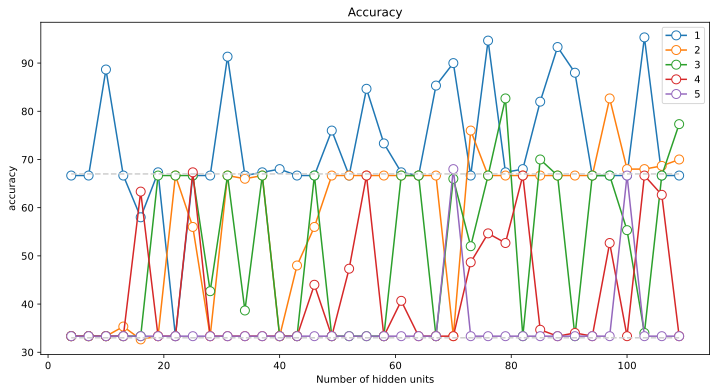

In [43]:
# show accuracy as a function of model depth
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(n_units, accuracy_arr, "o-", markerfacecolor="w", markersize=9)
ax.plot(n_units[[0, -1]], [33, 33], "--", color=[0.8, 0.8, 0.8])
ax.plot(n_units[[0, -1]], [67, 67], "--", color=[0.8, 0.8, 0.8])
ax.legend(n_layers)
ax.set_ylabel("accuracy")
ax.set_xlabel("Number of hidden units")
ax.set_title("Accuracy")
plt.show()

#### Observation(s)

- The wider models performed significantly better than the deeper models. i.e width is better than depth.